In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

from scipy import optimize, stats

In [2]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=13)

if os.environ['USER'] == 'dhayaa':
    os.environ['PATH'] = f"{os.environ['PATH']}:/software/texlive-2022-el8-x86_64/bin/x86_64-linux/"

COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Load tables

NFILES : 500
----------FULL BMODE----------
P-val: 0.41996308143356953
Chi2, Chi2/ndof: 41.151631637772226 1.0287907909443057
--------------------------------




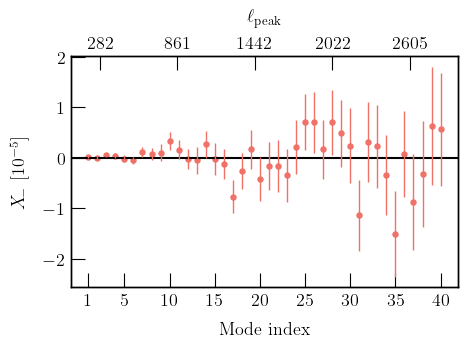

In [6]:
DIR = '/scratch/midway3/dhayaa/SHEARTESTS_20241219/FIDUCIAL/'
plt.figure(figsize = (5,3))

plt.axhline(0, color ='k')

B   = np.load(DIR + '/MRBmode_B.npy')[:]
Cov = np.load(DIR + '/MRBmode_B_Cov.npy')[:].T[:]
res = B
# res[:2] = 0
Nmodes = len(B)
NJK = 500; print(f"NFILES :", NJK)
hartlap  = ((NJK - Nmodes - 2) / (NJK -  1))
dodelson = 1 / (1 + (Nmodes - 3) * (NJK - Nmodes - 2) / (NJK - Nmodes - 1) / (NJK - Nmodes - 4) )

inv = np.linalg.inv(Cov) * hartlap * dodelson
chi2 = res @ inv @ res

print("----------FULL BMODE----------")
print("P-val:", 1 - stats.chi2(df = len(res)).cdf(chi2))
print("Chi2, Chi2/ndof:", chi2, chi2/len(res))
print("--------------------------------\n\n")


plt.scatter(np.arange(Nmodes) + 1 , B * 1e5, s=13, color = COLORS[0])
plt.errorbar(np.arange(Nmodes) + 1 , B * 1e5, yerr = np.sqrt(np.diagonal(Cov))  * 1e5, fmt = 'none', color = COLORS[0], lw = 0, elinewidth = 1)

ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40]
plt.xticks(ticks, ticks)
plt.ylabel(r'$X_{\!-}$  [$10^{-5}$]', size = 13, labelpad = 10)
plt.xlabel('Mode index', size = 13, labelpad = 10);

COEFF = np.load('/scratch/midway3/dhayaa/EB_Coefficients_N40.npy', allow_pickle = True)

ax2 = plt.gca().twiny()
ax2.set_xticks(np.arange(3, 40, 8))
ax2.set_xticklabels([int(COEFF[i - 1][3][np.argmax(np.abs(COEFF[i - 1][4]))]) for i in np.arange(3, 40, 8)])
ax2.set_xlim(0, len(B))
ax2.set_xlabel(r'$\ell_{\rm peak}$', size = 13, labelpad = 10)
del COEFF

plt.savefig('./Bmode.pdf', dpi = 300, bbox_inches = 'tight')

# Plot the mode weights just to check

40 2957
35 2605
30 2238
25 1874
20 1517
15 1148
10 791
5 427
1 140


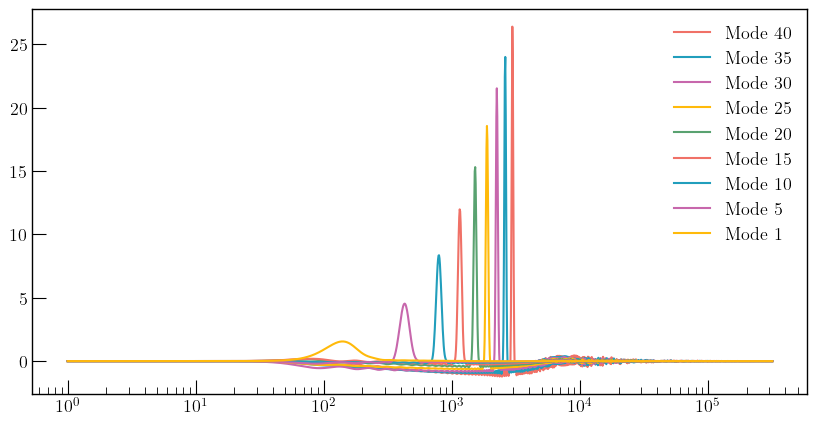

In [26]:
plt.figure(figsize = (10, 5))
plt.xscale('log')

COEFF = np.load('/scratch/midway3/dhayaa/EB_Coefficients_N40.npy', allow_pickle = True)

for i in ticks[::-1]:
    plt.plot(COEFF[i - 1][3], COEFF[i - 1][4], label = f'Mode {i}')
    
    ell_peak = int(COEFF[i - 1][3][np.argmax(np.abs(COEFF[i - 1][4]))])
    
    print(i, ell_peak)
    
plt.legend()

# Cov checks

In [27]:
# import glob

# plt.figure(figsize = (5,3))

# plt.axhline(0, color ='k')

# Cov3 = np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/FIDUCIAL/MRBmode_B_Cov.npy')

# Files = glob.glob('/project/chihway/dhayaa/DECADE/BmodeLeakage/Cosmogrid_Test_20240918_N*.npy')
# Cov  = np.cov(np.array([np.load(f, allow_pickle = True)[()]['B'] for f in Files]).T)
# Cov2 = np.load(Files[0], allow_pickle = True)[()]['cov_B']

# Files = glob.glob('/project/chihway/dhayaa/DECADE/BmodeLeakage/Cosmogrid_Test_20240929_N*.npy')
# Cov4  = np.cov(np.array([np.load(f, allow_pickle = True)[()]['B'] for f in Files]).T)

# ind = np.arange(20)
# plt.plot(1/ind * np.sqrt(np.diag(Cov3)), label = 'JK data')
# plt.plot(1/ind * np.sqrt(np.diag(Cov2)), label = 'JK Sim')
# plt.plot(1/ind * np.sqrt(np.diag(Cov)),  label = 'Sample Sim')
# plt.plot(1/ind * np.sqrt(np.diag(Cov4)),  label = 'Sample Sim (+ meas)')
# # plt.scatter(s + 1 , B/s * 1e5, s=13, color = COLORS[0])
# # plt.errorbar(s + 1 , B/s * 1e5, yerr = np.sqrt(np.diagonal(Cov))/s  * 1e5, fmt = 'none', color = COLORS[0], lw = 0, elinewidth = 1)

# ticks = [1, 4, 8, 12, 16, 20]
# plt.xticks(ticks, ticks)
# plt.ylabel(r'$X_{\!-}$  [$10^{-5}$]', size = 13, labelpad = 10)
# plt.xlabel('Mode index', size = 13, labelpad = 10)
# plt.legend(fontsize = 15, frameon = False)
# # plt.savefig('./Bmode.pdf', dpi = 300, bbox_inches = 'tight')